<a href="https://colab.research.google.com/github/Kazu0214/seminar/blob/main/section01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニング入門

In [10]:
# 必要ライブラリをインポート
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# 学習データの設定(numpy二次元配列)
data = np.array([[166,58.7],
                 [176,75.7],
                 [171,62.1],
                 [173,70.4],
                 [169,60.1]])

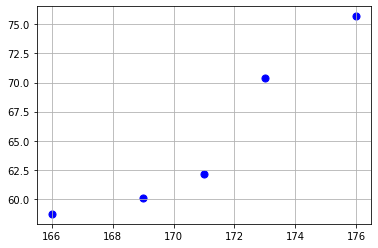

In [22]:
# 散布図で可視化
plt.scatter( data[:,0], data[:,1], s=50, c='b' )
plt.grid()
plt.show()

In [12]:
# データの確認
print(data)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [23]:
# 身長、体重の平均値の計算
mean = data.mean(axis=0) # axis=0は列 axis=1は行 今回は列ごとの平均が欲しいのでaxis=0を使用
print(mean)

[171.   65.4]


In [24]:
# 元データの平行移動
data01 = data - mean
print(data01)

[[-5.  -6.7]
 [ 5.  10.3]
 [ 0.  -3.3]
 [ 2.   5. ]
 [-2.  -5.3]]


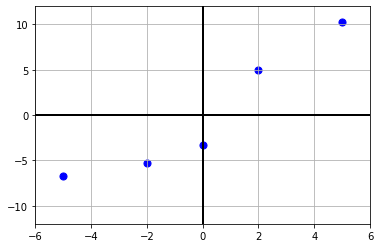

In [31]:
# 平行移動後を可視化
plt.scatter(data01[:,0],data01[:,1],s=50,c='b')
plt.plot([-6,6],[0,0], lw=2, c='k')
plt.plot([0,0],[-12,12], lw=2, c='k')
plt.xlim(-6,6)
plt.ylim(-12,12)
plt.grid()
plt.show()

## *前処理*

### 学習データ作成

In [32]:
# 入力データの抽出
x1 = data01[:,0:1]
print(x1)
print(x1.shape)

[[-5.]
 [ 5.]
 [ 0.]
 [ 2.]
 [-2.]]
(5, 1)


In [33]:
# ダミー変数を追加
x = np.insert(x1, 0, 1.0, axis=1)
print('ダミー変数追加後')
print(x)
print(x.shape)

ダミー変数追加後
[[ 1. -5.]
 [ 1.  5.]
 [ 1.  0.]
 [ 1.  2.]
 [ 1. -2.]]
(5, 2)


### 正解データ

In [34]:
yt = data01[:,1]
print(yt)

[-6.7 10.3 -3.3  5.  -5.3]


### モデル開発

In [35]:
# 予測関数(1,x)の値から予測値ypを計算する
def pred(x, w):
  return(x @ w)

In [36]:
# 重みベクトルの初期値(勝手な値を設定)
w = np.array([2,-1])
yp = pred(x, w)
print(yp)

[ 7. -3.  2.  0.  4.]


In [37]:
# 損失関数の計算
yd = yp - yt
L = np.mean(yd ** 2) / 2
print(L)


50.41600000000001


In [38]:
# 初期化処理

# データの行数(系列総数)
M = x.shape[0]

# データの列数(次元数)
D = x.shape[1]

# 繰り返し回数
iters = 250

# 学習率
alpha = 0.01

# 重みベクトルの初期値(勝手な値を設定)
w = np.array([2, -1])

# 評価結果記録用(損失関数値,w0,w1を記録)
history = np.zeros((0,4))

In [40]:
# 繰り返しループ
for k in range(iters):

  # 予測値の計算
  yp = pred(x,w)

  # 誤差の計算
  yd = yp -yt

  # 勾配降下法の実装
  w = w - alpha * (x.T @ yd) / M
  
  # 学習曲線描画用データ計算、保存

  # 重みベクトル値の取得
  w0 = float(w[0])
  w1 = float(w[1])

  # 損失関数値の計算
  L = np.mean(yd ** 2)/2

  # 計算結果の記録
  line = np.array([k,L,w0,w1])
  history = np.vstack((history,line))

  # 画面表示
  print("iter = %d L=%f w0=%f w1=%f"%(k,L,w0,w1))

iter = 0 L=50.416000 w0=1.980000 w1=-0.672800
iter = 1 L=40.291163 w0=1.960200 w1=-0.383555
iter = 2 L=32.371142 w0=1.940598 w1=-0.127863
iter = 3 L=26.174246 w0=1.921192 w1=0.098169
iter = 4 L=21.324050 w0=1.901980 w1=0.297982
iter = 5 L=17.526391 w0=1.882960 w1=0.474616
iter = 6 L=14.551393 w0=1.864131 w1=0.630760
iter = 7 L=12.219413 w0=1.845489 w1=0.768792
iter = 8 L=10.390065 w0=1.827034 w1=0.890812
iter = 9 L=8.953642 w0=1.808764 w1=0.998678
iter = 10 L=7.824409 w0=1.790677 w1=1.094031
iter = 11 L=6.935365 w0=1.772770 w1=1.178324
iter = 12 L=6.234151 w0=1.755042 w1=1.252838
iter = 13 L=5.679844 w0=1.737492 w1=1.318709
iter = 14 L=5.240467 w0=1.720117 w1=1.376939
iter = 15 L=4.891024 w0=1.702916 w1=1.428414
iter = 16 L=4.611984 w0=1.685886 w1=1.473918
iter = 17 L=4.388078 w0=1.669028 w1=1.514143
iter = 18 L=4.207373 w0=1.652337 w1=1.549703
iter = 19 L=4.060543 w0=1.635814 w1=1.581137
iter = 20 L=3.940296 w0=1.619456 w1=1.608925
iter = 21 L=3.840932 w0=1.603261 w1=1.633490
iter = 2

In [41]:
np.set_printoptions(precision=3)
yp = pred(x, w)
print('最終的な予測値')
print(yp)
print('正解値')
print(yt)

最終的な予測値
[-8.941  9.266  0.162  3.803 -3.479]
正解値
[-6.7 10.3 -3.3  5.  -5.3]


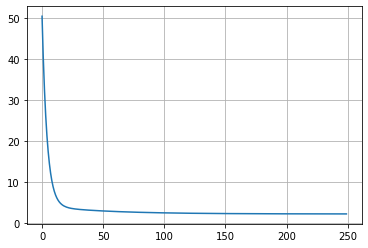

In [42]:
# 学習曲線の表示
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.show()

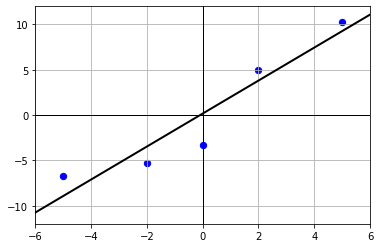

In [46]:
# 散布図と回帰直線を同時表示

X = np.array([[1, -6],[1, 6]])
Y = pred(X, w)

plt.scatter(data01[:,0], data01[:,1], s=40, c='b')
plt.plot([-6, 6], Y, lw=2, c='k')
plt.plot([-6,6],[0,0], lw=1, c='k')
plt.plot([0,0],[-12,12],lw=1,c='k')
plt.xlim(-6,6)
plt.ylim(-12,12)
plt.grid()
plt.show()

In [47]:
# Scikit-learnのライブラリを使って線形回帰モデルを作成

from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(x1, yt)

# 切片と傾きの取得
W0 = clf.intercept_
W1 = clf.coef_
print('パラメータ値比較')
print('実習で求めた結果 w0 = %6.2f w1 = %6.2f' % (w0, w1))
print('ライブラリの結果 w0 = %6.2f w1 = %6.2f' % (W0, W1))

パラメータ値比較
実習で求めた結果 w0 =   0.16 w1 =   1.82
ライブラリの結果 w0 =  -0.00 w1 =   1.82
